In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#load the data in gmaes.csv
games = pd.read_csv("games.csv")



In [3]:
# print the columns present in our data 

print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [4]:
print (games.shape)

# printing the shape of the dataframe gives us (81312 rows and 20 columns) i.e we have 81312 different games and 2o features

(81312, 20)


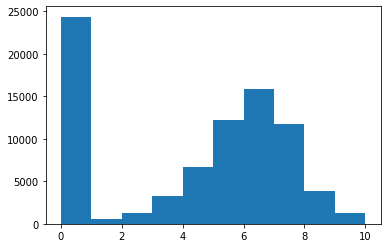

In [5]:
# avg wight is the function of complexity of the game. the higher the weight the more complex is game

# making a histogram of the ratings in the avg rating column

plt.hist(games["average_rating"])
plt.show()

In [6]:
# we can see almost 24k games with an avg rating of zero 

#print the first row of games dataset with avg rating 0

print(games[games["average_rating"]==0].iloc[0])


id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


In [7]:
#print the first row games dataset with avg rating > 0

print (games[games["average_rating"]>0].iloc[0])

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


In [8]:
#Remove all rows without user reviews

games=games[games["users_rated"]>0]

In [9]:
# Remove all rows with missing values 
games.dropna(axis=0,inplace=True)

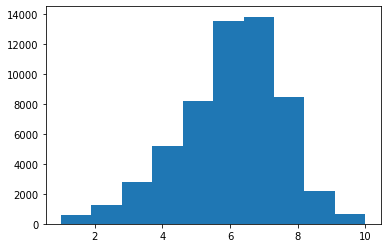

In [10]:
# making a histogram of the avg rating again

plt.hist(games["average_rating"])
plt.show()

In [11]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


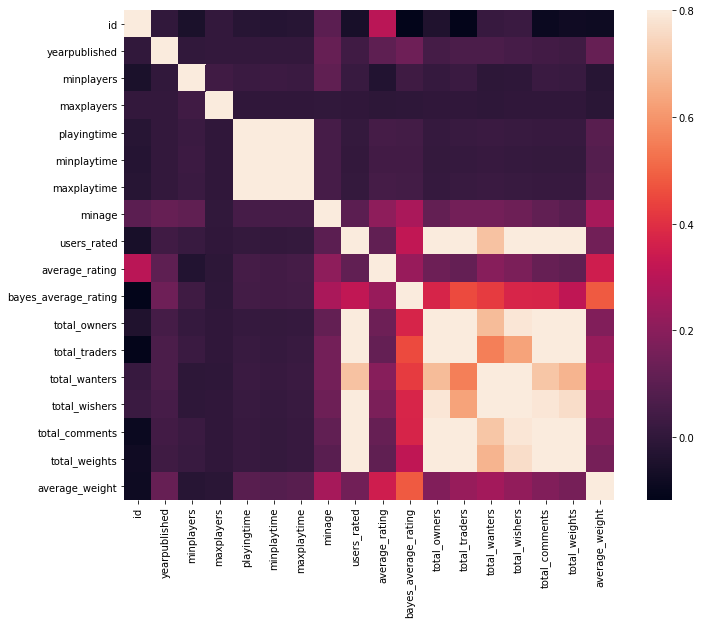

In [12]:
#Making a correlation matrix

corr_matrox=games.corr()
figure=plt.figure(figsize=(12,9))
sns.heatmap(corr_matrox,vmax=.8,square=True)
plt.show()

In [13]:
#get all the columns from the dataframe in a list

columns = games.columns.tolist()

In [14]:
# filer the columns to remove the data we dont want 

columns =[c for c in columns if c not in ["bayes_average_rating","average_rating","type","name","id"]]

In [15]:
#Storing the variable we will be predicting 

target= "average_rating"

In [16]:
#Generate training and test data sets

from sklearn.model_selection import train_test_split

#generate training set 

train_set=games.sample(frac=0.8,random_state=1)

# Selecting anything not in traning set and putting it into test set

test_set=games.loc[~games.index.isin(train_set.index)]

In [17]:
#checking shapes of train and test set

print("Train data shape",train_set.shape)
print("Test data shape",test_set.shape)

Train data shape (45515, 20)
Test data shape (11379, 20)


In [19]:
#importing the linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR=LinearRegression()

LR.fit(train_set[columns],train_set[target])




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#Now let's generate predictions for the test set

predictions=LR.predict(test_set[columns])

#Computing the mean squared error

mean_squared_error(predictions,test_set[target])

2.078819032629326